In [2]:
import cogent3
from cogent3 import get_app
import matplotlib.pyplot as plt
import paths
import libs

# CDS sample alignment

I sampled chromosome 22 cds using 
```
eti homologs -i install/ --outdir cds --ref human --coord_names 22 
```
Then I trim stop codons and use a codon alignment model for all the sequences using
```
trim_stops = get_app("trim_stop_codons")
codon_align = get_app("progressive_align", "codon", guide_tree="(Human:0.06,Chimpanzee:0.06,Gorilla:0.1)")
```
I store the aligned sequences in the folder cds/codon_aligned/

In [3]:
folder_in = paths.DATA_APES114 + 'cds/codon_aligned/'
in_dstore = cogent3.open_data_store(folder_in, suffix='fa', mode='r')

print(in_dstore.describe)

Directory datastore
record type      number
-----------------------
completed           345
not_completed        51
logs                  1
-----------------------


In [4]:
loader = get_app("load_aligned", moltype="dna")   
omit_degs = get_app("omit_degenerates", moltype="dna", motif_length=3)
ffold = get_app("take_codon_positions", fourfold_degenerate=True)
concat = get_app("concat", moltype="dna")

#create a concatenated alignment with all coding positions
ffoldprocess = loader+omit_degs+ffold
# result below is only valid alignments (no NotCompleted).
results_ffold = [r for r in ffoldprocess.as_completed(in_dstore[:], parallel=True) if r]
ffold_alns = concat(results_ffold)
ffold_alns.source = "cds_alignments"

hum_chimps_aln = ffold_alns.take_seqs(["Human", "Chimpanzee"])
hum_chimps_aln

   0%|          |00:00<?

,0
Chimpanzee,CCCCGCCGTTCCCACCTGAGCCAGTCCTATTACGACAGGACCCTACGGGCGCGATACCAC
Human,............................G......................T........


In [5]:
#Do a Kimura 1980 substitution model
sm = get_app("model", "K80", optimise_motif_probs=True, show_progress=True)
result = sm(hum_chimps_aln)
print("Model results : \n" + str(result.lf) + "\n")

print("Distances: ")
lengthstree_pos1 = result.lf.get_lengths_as_ens()
humanENS_cdsffold = lengthstree_pos1["Human"]
print(lengthstree_pos1)

   0%|          |00:00<?

Model results : 
K80
log-likelihood = -130702.8589
number of free parameters = 3
=====
kappa
-----
 5.70
-----
edge          parent    length
------------------------------
Human         root        0.01
Chimpanzee    root        0.00
------------------------------
   A       C       G       T
----------------------------
0.25    0.25    0.25    0.25
----------------------------

Distances: 
{'Human': np.float64(0.01151842682124967), 'Chimpanzee': np.float64(0.004496306076519288)}


# Intron sample alignment

I sampled chromosome 22 introns masking ancestral repeats and cds using 
```
eti alignments -i install -od introns --align_name 10_primates* --ref human --mask cds_allAR_1column.txt --coord_names 22 
```
where cds_allAR_1column.txt is a list containing all the biotypes for ancestral repeats and cds

In [6]:
folder_in = paths.DATA_APES114 + 'introns/'
in_dstore = cogent3.open_data_store(folder_in, suffix='fa', mode='r')

print(in_dstore.describe)

Directory datastore
record type      number
-----------------------
completed           543
not_completed         0
logs                  1
-----------------------


In [7]:
#perform a codon alignment and remove stop codons
loader_noncds = get_app("load_aligned", moltype="dna")
omit_degs_noncds = get_app("omit_degenerates", moltype="dna")
rename_noncds = libs.renamer_noncds_aligned()

app_noncds = loader_noncds + omit_degs_noncds + rename_noncds
#By using this renamer_aligned function I throw away sequences with paralogs
results_allpos = [r for r in app_noncds.as_completed(in_dstore[:], parallel=True) if r]
alpos_alns = concat(results_allpos)
alpos_alns.source = "introns_alignments"
alpos_alns

hum_chimps_aln = alpos_alns.take_seqs(["Human", "Chimpanzee"])
hum_chimps_aln

   0%|          |00:00<?

,0
Chimpanzee,GGGGCGCTGGCGTGCGGTGTCTGGCCTCCGGCGCTGGAGCTGGTTCAGGGCACTCCCCTG
Human,............................................................


In [8]:
#Do a Kimura 1980 substitution model
sm = get_app("model", "K80", optimise_motif_probs=True, show_progress=True)
result = sm(hum_chimps_aln)
print("Model results : \n" + str(result.lf) + "\n")

print("Distances: ")
lengthstree_pos1 = result.lf.get_lengths_as_ens()
humanENS_intron = lengthstree_pos1["Human"]
print(lengthstree_pos1)

   0%|          |00:00<?

Model results : 
K80
log-likelihood = -10058737.0663
number of free parameters = 3
=====
kappa
-----
 4.85
-----
edge          parent    length
------------------------------
Human         root        0.01
Chimpanzee    root        0.00
------------------------------
   A       C       G       T
----------------------------
0.25    0.25    0.25    0.25
----------------------------

Distances: 
{'Human': np.float64(0.011472072496296247), 'Chimpanzee': np.float64(0.000393942055279599)}


# Intron AR sample alignment

I sampled chromosome 22 introns masking everythin but ancestral repeats using 
```
eti alignments -i install -od intronsAR --align_name 10_primates* --ref human --mask_shadow ancestralrepeats_1column.txt --coord_names 22 
```
where ancestralrepeats_1column.txt is a list containing the ancestral repeats biotypes: 
Type I Transposons/LINE,
Type I Transposons/SINE,
Type II Transposons,
LTRs

In [9]:
folder_in = paths.DATA_APES114 + 'intronsAR/'
in_dstore = cogent3.open_data_store(folder_in, suffix='fa', mode='r')

print(in_dstore.describe)

Directory datastore
record type      number
-----------------------
completed           553
not_completed         0
logs                  1
-----------------------


In [10]:
#By using this renamer_aligned function I throw away sequences with paralogs
results_allpos = [r for r in app_noncds.as_completed(in_dstore[:], parallel=True) if r]
alpos_alns = concat(results_allpos)
alpos_alns.source = "intronsAR_alignments"
alpos_alns

hum_chimps_aln = alpos_alns.take_seqs(["Human", "Chimpanzee"])

hum_chimps_aln

   0%|          |00:00<?

,0
Chimpanzee,AAGATCAGAGGTCCAGATTCAGACAGACCTGGGTTCAAGTCCCAGCTTTGTTAATTTGTC
Human,......................................A.....................


In [11]:
#Do a Kimura 1980 substitution model
sm = get_app("model", "K80", optimise_motif_probs=True, show_progress=True)
result = sm(hum_chimps_aln)
print("Model results : \n" + str(result.lf) + "\n")

print("Distances: ")
lengthstree_pos1 = result.lf.get_lengths_as_ens()
humanENS_intronAR = lengthstree_pos1["Human"]
print(lengthstree_pos1)

   0%|          |00:00<?

Model results : 
K80
log-likelihood = -8026050.5094
number of free parameters = 3
=====
kappa
-----
 5.04
-----
edge          parent    length
------------------------------
Human         root        0.01
Chimpanzee    root        0.00
------------------------------
   A       C       G       T
----------------------------
0.25    0.25    0.25    0.25
----------------------------

Distances: 
{'Human': np.float64(0.011531969566223595), 'Chimpanzee': np.float64(0.0022240452090283402)}


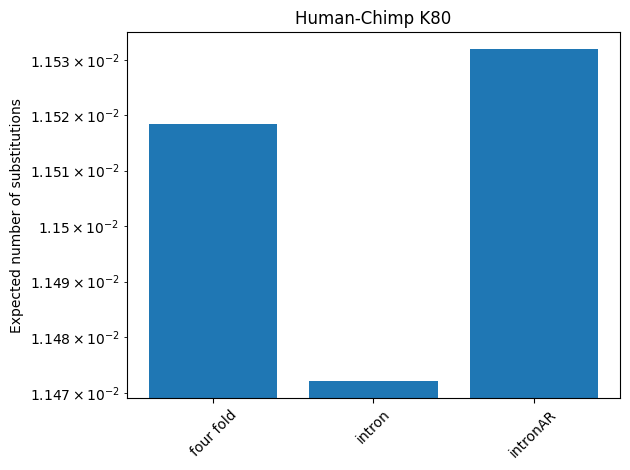

{'four fold': np.float64(0.01151842682124967),
 'intron': np.float64(0.011472072496296247),
 'intronAR': np.float64(0.011531969566223595)}

In [12]:
ENS_human_K80 = {
    "four fold": humanENS_cdsffold,
    "intron": humanENS_intron,
    "intronAR": humanENS_intronAR
}

plt.figure()
plt.bar(ENS_human_K80.keys(), ENS_human_K80.values())
plt.yscale("log")
plt.ylabel("Expected number of substitutions")
plt.title("Human-Chimp K80")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

ENS_human_K80

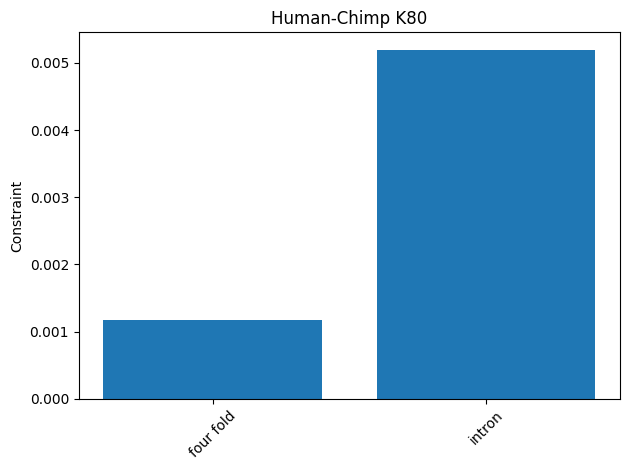

{'four fold': np.float64(0.0011743653064772985),
 'intron': np.float64(0.005194001734342368)}

In [13]:
constraint_K80 = {
    "four fold": 1-humanENS_cdsffold/humanENS_intronAR,
    "intron": 1-humanENS_intron/humanENS_intronAR
}

plt.figure()
plt.bar(constraint_K80.keys(), constraint_K80.values())
plt.ylabel("Constraint")
plt.title("Human-Chimp K80")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

constraint_K80